<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_12%EC%B0%A8%EC%8B%9C_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []
for x in X:
  for y in Y:
    input_data.append([x, y])
    if y < np.sin(np.pi * x):
      correct_data.append([0, 1])
    else:
      correct_data.append([1, 0])

n_data = len(correct_data)

In [29]:
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [30]:
n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

In [31]:
class MiddleLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = 1 / (1 + np.exp(-u))
  def backward(self, grad_y):
    delta = grad_y * (1 - self.y) * self.y
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)
  def update(self, eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

In [32]:
class OutputLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True)
    # keepdims=True 출력 결과의 차원수가 변하지 않도록 고정
  def backward(self, t):
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)
  def update(self, eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

In [33]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

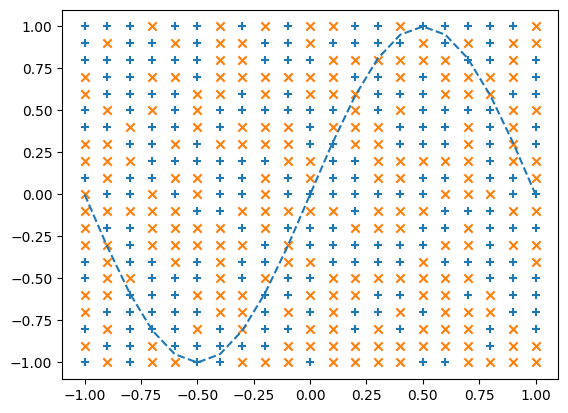

Epoch: 0/101 Error: 0.7193974454903908


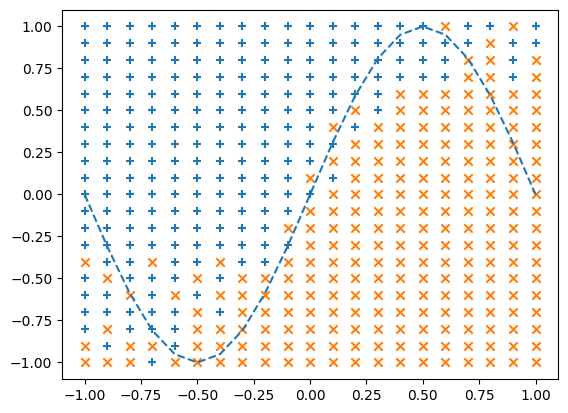

Epoch: 10/101 Error: 0.32131703615221174


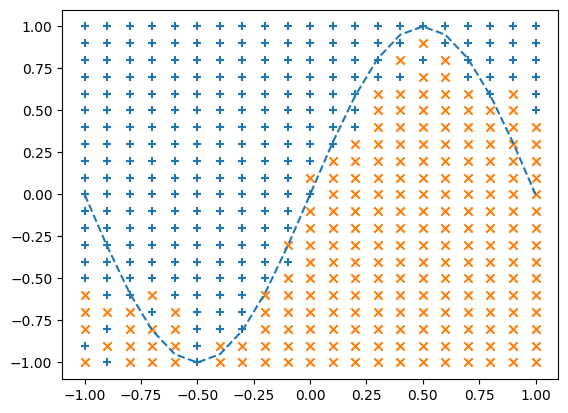

Epoch: 20/101 Error: 0.22474672896641934


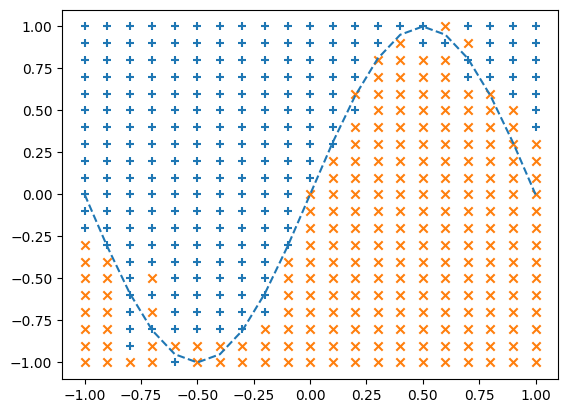

Epoch: 30/101 Error: 0.17102124176608208


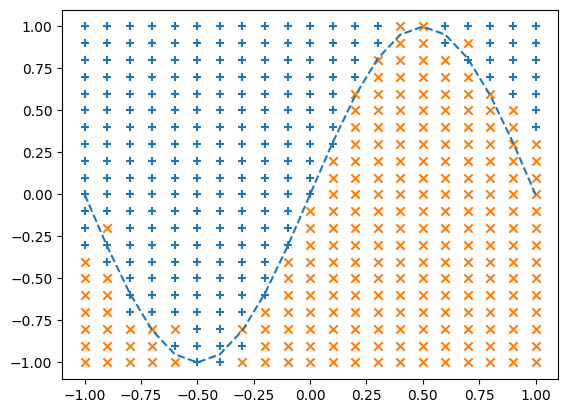

Epoch: 40/101 Error: 0.13295340899808245


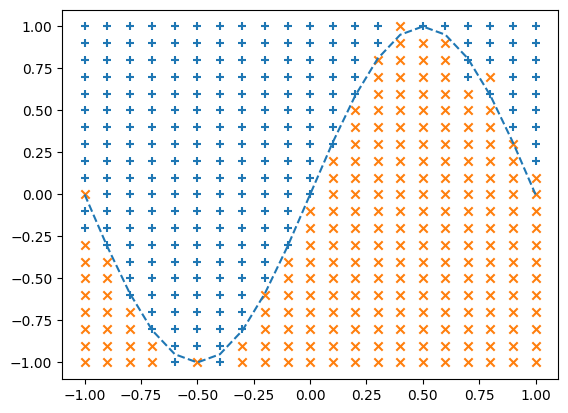

Epoch: 50/101 Error: 0.10408537224931098


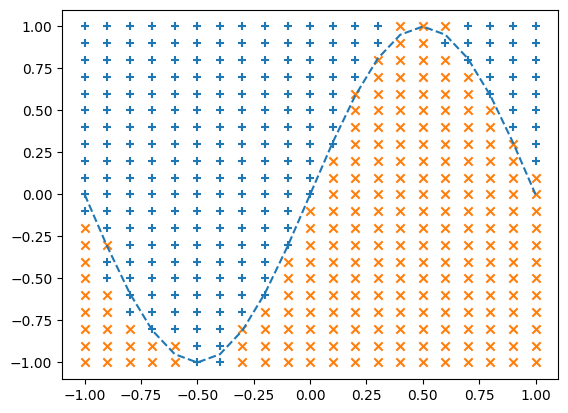

Epoch: 60/101 Error: 0.09658509073270047


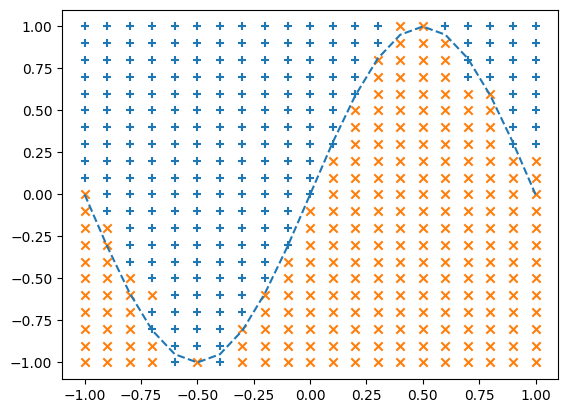

Epoch: 70/101 Error: 0.07886460993279994


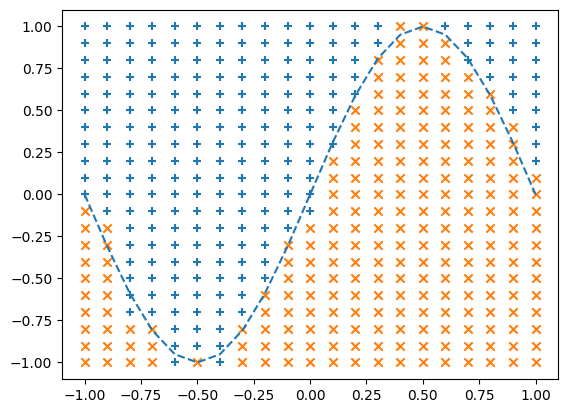

Epoch: 80/101 Error: 0.07904942753011986


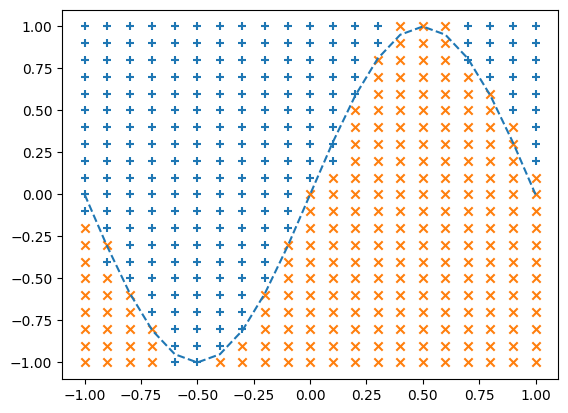

Epoch: 90/101 Error: 0.07567500224726925


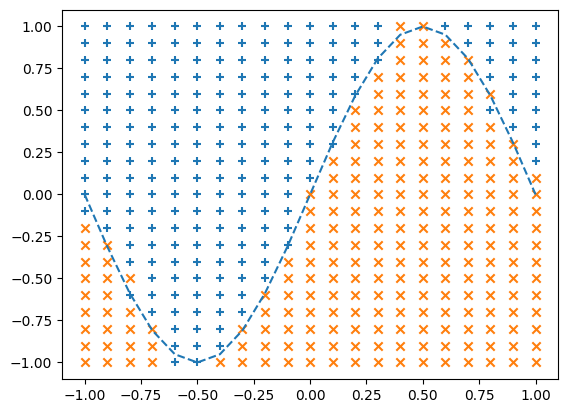

Epoch: 100/101 Error: 0.07316001187775804


In [35]:
sin_data = np.sin(np.pi * X)

for i in range(epoch):
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)

  total_error = 0
  x_1 = []
  y_1 = []
  x_2 = []
  y_2 = []

  for idx in index_random:
    x = input_data[idx]
    t = correct_data[idx]

    middle_layer.forward(x.reshape(1, 2))
    output_layer.forward(middle_layer.y)

    output_layer.backward(t.reshape(1, 2))
    middle_layer.backward(output_layer.grad_x)

    middle_layer.update(eta)
    output_layer.update(eta)

    if i % interval == 0:
      y = output_layer.y.reshape(-1)
      total_error += -np.sum(t * np.log(y + 1e-7))

      if y[0] > y[1]:
        x_1.append(x[0])
        y_1.append(x[1])
      else:
        x_2.append(x[0])
        y_2.append(x[1])

  if i % interval == 0:
    plt.plot(X, sin_data, linestyle='dashed')
    plt.scatter(x_1, y_1, marker='+')
    plt.scatter(x_2, y_2, marker='x')
    plt.show()

    print('Epoch: ' + str(i) + '/' + str(epoch), 'Error: ' + str(total_error / n_data))